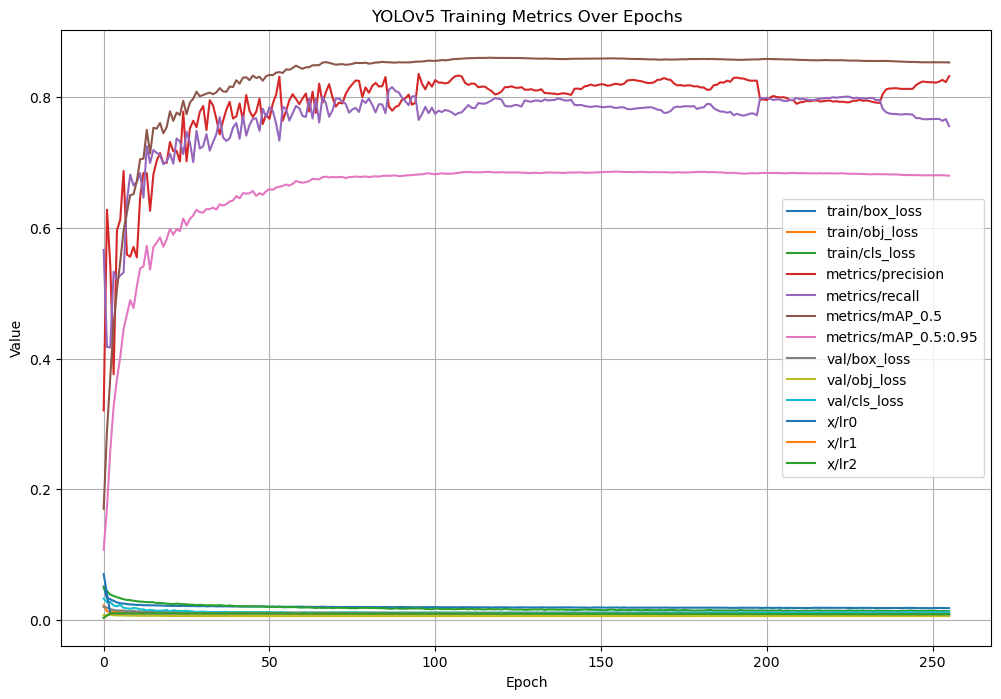

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/piglet/Desktop/results/Detection/RAFDB/v5_RAFDB_YOLO_Detection/exp/results.csv'
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()

columns = data.columns

variables = columns[1:]

plt.figure(figsize=(12, 8))

for variable in variables:
    plt.plot(data['epoch'], data[variable], label=variable)

plt.title('YOLOv5 Training Metrics Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


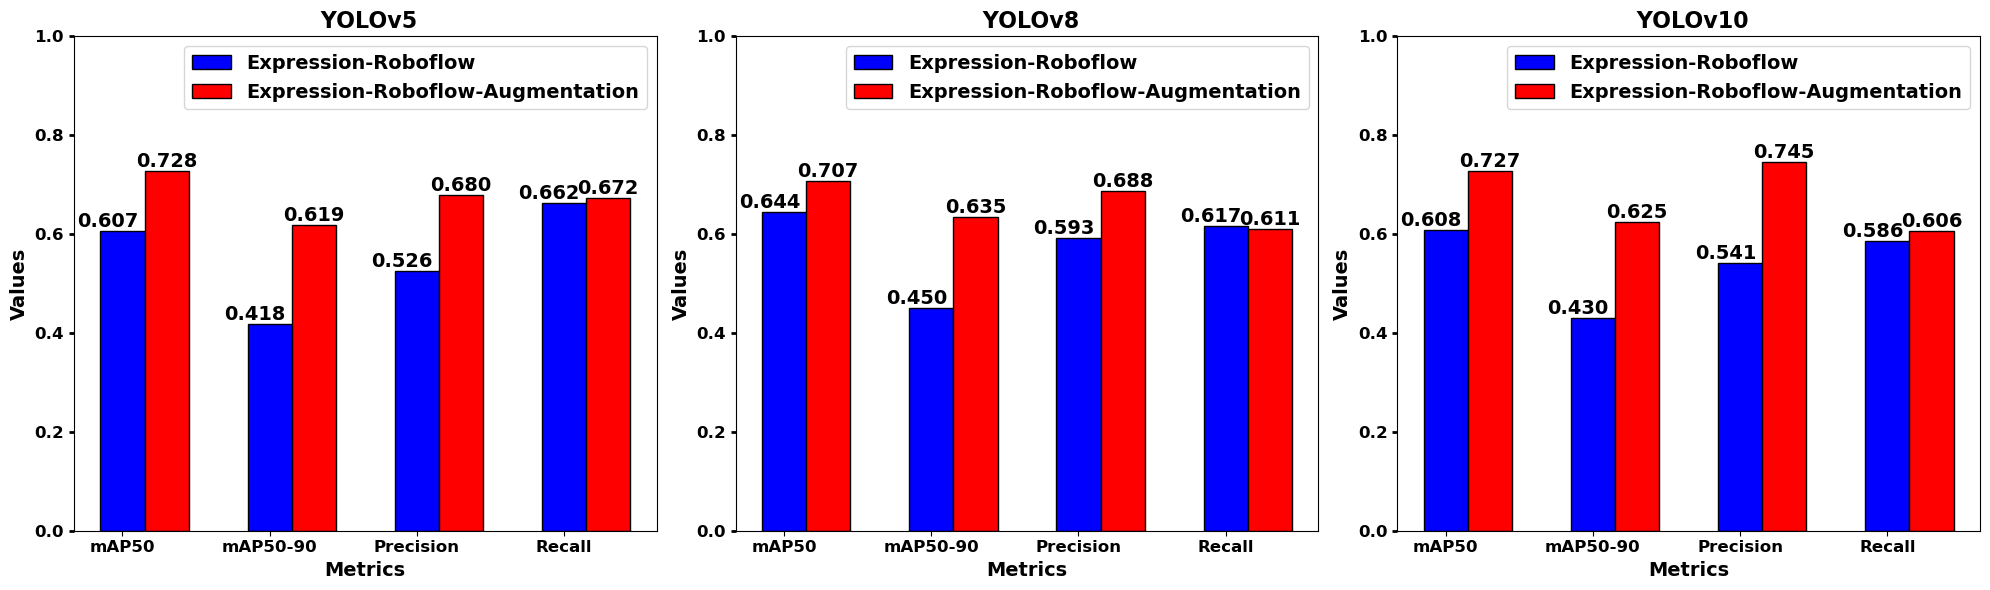

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/piglet/Desktop/Project_Code/Comparison/csv1.xlsx'
sheet_name1 = 'Expression-Roboflow'
sheet_name2 = 'Expression-RoboflowAugmentation'

data1 = pd.read_excel(file_path, sheet_name=sheet_name1)
data2 = pd.read_excel(file_path, sheet_name=sheet_name2)

# bar chart
def plot_comparison(data1, data2, title, ax):
    bar_width = 0.3
    r1 = np.arange(len(data1.columns) - 1)
    r2 = [x + bar_width for x in r1]
    bars1 = ax.bar(r1, data1.iloc[0, 1:], width=bar_width, label='Expression-Roboflow', color='blue', edgecolor='black')
    bars2 = ax.bar(r2, data2.iloc[0, 1:], width=bar_width, label='Expression-Roboflow-Augmentation', color='red', edgecolor='black')
    
    for bar in bars1:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2-0.1, yval, f'{yval:.3f}', va='bottom', ha='center', fontweight='bold', fontsize=14)  
    
    for bar in bars2:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', va='bottom', ha='center', fontweight='bold', fontsize=14) 
    
    ax.set_xlabel('Metrics', fontsize=14, fontweight='bold')
    ax.set_ylabel('Values', fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xticks([r + bar_width/2 - 0.15 for r in range(len(r1))])
    ax.set_xticklabels(data1.columns[1:], fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1]) 

    legend = ax.legend(fontsize=14, loc='upper right')
    for text in legend.get_texts():
        text.set_fontweight('bold')

    ax.tick_params(axis='y', labelsize=12, width=2)
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
model_names = ["YOLOv5", "YOLOv8", "YOLOv10"]

for index, model in enumerate(model_names):
    model_data1 = data1[data1['Models'] == model]
    model_data2 = data2[data2['Models'] == model]
    plot_comparison(model_data1, model_data2, f' {model}', axes[index])

plt.tight_layout()
plt.show()


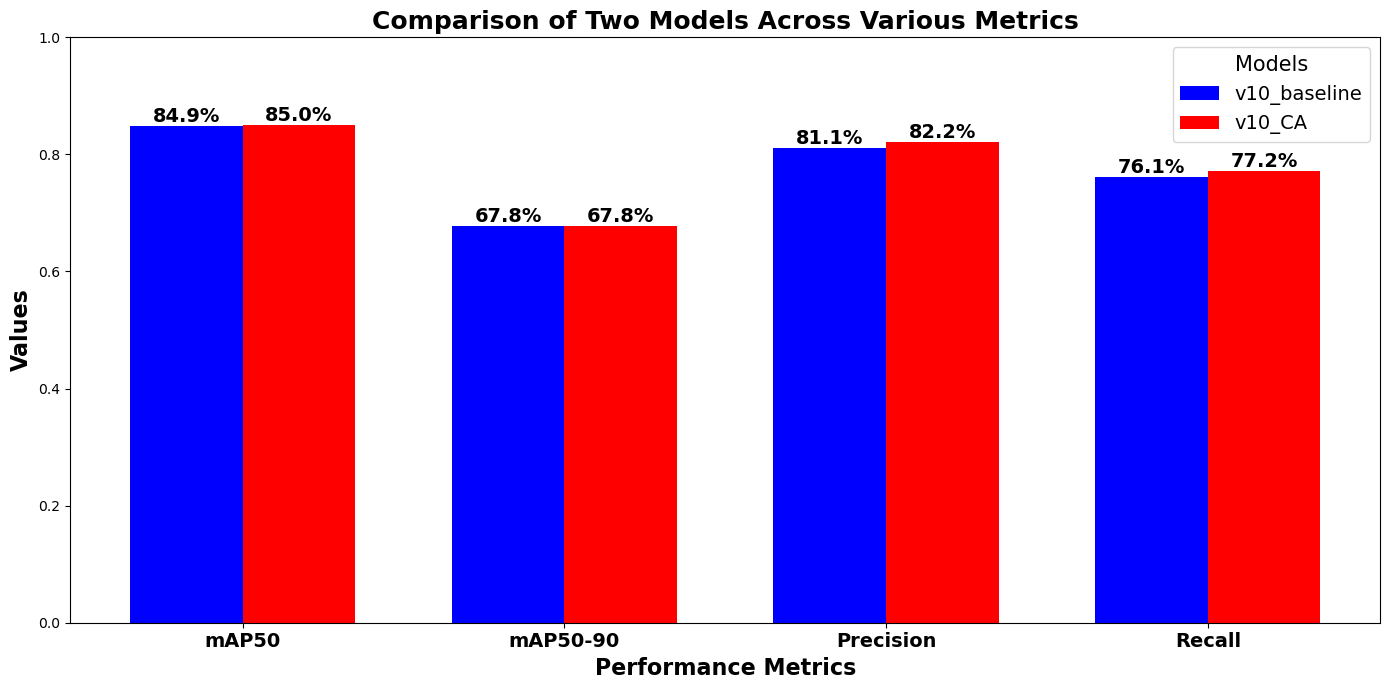

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/piglet/Desktop/Project_Code/Comparison/csv2.xlsx'

data = pd.read_excel(file_path)

data_cleaned = data.dropna(subset=['Models '])  

data_cleaned.set_index('Models ', inplace=True)

models_to_compare = data_cleaned.index[:2]
data_to_plot = data_cleaned.loc[models_to_compare]

columns_to_plot = ['mAP50', 'mAP50-90', 'Precision', 'Recall']

fig, ax = plt.subplots(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(columns_to_plot))

bars1 = ax.bar(index - bar_width/2, data_to_plot.iloc[0], bar_width, label=data_to_plot.index[0], color='blue')
bars2 = ax.bar(index + bar_width/2, data_to_plot.iloc[1], bar_width, label=data_to_plot.index[1], color='red')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        label = f'{height * 100:.1f}%'
        ax.text(bar.get_x() + bar.get_width()/2, height, label, va='bottom', ha='center', fontweight='bold', fontsize=14)

add_labels(bars1)
add_labels(bars2)

ax.set_xlabel('Performance Metrics', fontsize=16, fontweight='bold')
ax.set_ylabel('Values', fontsize=16, fontweight='bold')
ax.set_title('Comparison of Two Models Across Various Metrics', fontsize=18, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(columns_to_plot, fontsize=14, fontweight='bold', rotation=0) 
ax.set_ylim(0, 1) 
ax.legend(fontsize=14, title_fontsize='15', title='Models')

plt.tight_layout()
plt.show()


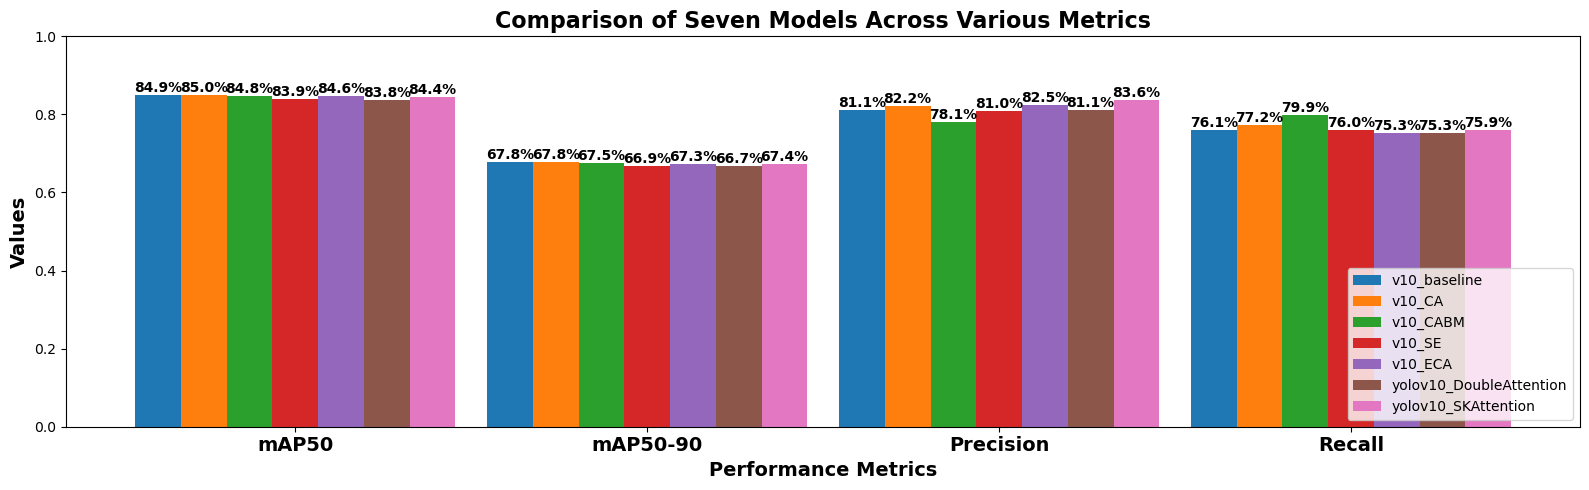

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = '/Users/piglet/Desktop/Project_Code/Comparison/csv2.xlsx'

data = pd.read_excel(file_path)
data_cleaned = data.dropna(subset=['Models ']) 

data_cleaned.set_index('Models ', inplace=True)

models_to_compare = data_cleaned.index[:7] 
data_to_plot = data_cleaned.loc[models_to_compare]

columns_to_plot = ['mAP50', 'mAP50-90', 'Precision', 'Recall']

fig, ax = plt.subplots(figsize=(16, 5))
bar_width = 0.13  
index = np.arange(len(columns_to_plot))

for i, model in enumerate(models_to_compare):
    ax.bar(index + bar_width*i, data_to_plot.loc[model], bar_width, label=model)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        label = f'{height * 100:.1f}%'
        ax.text(bar.get_x() + bar.get_width()/2, height, label, va='bottom', ha='center', fontweight='bold', fontsize=10)

for i in range(len(models_to_compare)):
    add_labels(ax.patches[i*len(columns_to_plot):(i+1)*len(columns_to_plot)])

ax.set_xlabel('Performance Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Values', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Seven Models Across Various Metrics', fontsize=16, fontweight='bold')
ax.set_xticks(index + bar_width * (len(models_to_compare)-1) / 2)
ax.set_xticklabels(columns_to_plot, fontsize=14, fontweight='bold')
ax.set_ylim(0, 1) 

ax.legend(fontsize=10, title_fontsize='11', loc='lower right')  

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
